## Employee Attrition Analysis
                           
**Introduction**:                                                                                                              

Employee attrition is a significant challenge for organizations, impacting productivity, morale, and operational continuity. Attrition occurs when employees leave an organization, often leading to a reduction in workforce size due to resignations or retirements that are not immediately replaced. Managing attrition through effective predictive models can help organizations proactively identify at-risk employees and implement targeted retention strategies.

**Business Problem**:     

The business problem revolves around understanding and predicting employee attrition to mitigate its adverse effects on organizational stability and performance. By leveraging machine learning techniques, we aim to identify key factors contributing to attrition and develop predictive models that can forecast attrition risks accurately.

**Objectives**:
1. Conduct comprehensive data analysis to explore and understand the dataset, focusing on variables that potentially influence attrition. (We have used Power BI for this).
2. Build and train classification models to predict employee attrition based on identified features.
3. Evaluate model performance using appropriate metrics and techniques to ensure reliability and accuracy.
4. Extract insights from model predictions to identify the most significant factors contributing to employee attrition.
5. Provide actionable recommendations to HR and organizational leaders for implementing targeted retention strategies based on predictive insights.

## Data Overview

**Dataset Link**:    https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset   
**Records**: We have total 1470 Observations and 35 Features                    
**Columns Description**:
- Age: A period of employee life, measured by years from birth.
- Attrition: The departure of employees from the organization.
- BusinessTravel: Did the employee travel on a business trip or not.
- DailyRate: Employee salary for the period is divided by the amount of calendar days in the period.
- Department: In which department the Employee working.
- DistanceFromHome: How far the Employee live from the office location.
- Education: In education 1 means 'Below College', 2 means 'College', 3 means 'Bachelor', 4 means 'Master', 5 means 'Doctor'
- EducationField: In which field Employee complete his education.
- EmployeeCount: How many employee working in a department
- EmployeeNumber: An Employee Number is a unique number that has been assigned to each current and former State employee and elected official in the Position and Personnel DataBase (PPDB).
- Job involvement: Is the degree to which an employee identifies with their work and actively participates in it where 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- JobLevel: Job levels, also known as job grades and classifications, set the responsibility level and expectations of roles at your organization. They may be further defined by impact, seniority, knowledge, skills, or job title, and are often associated with a pay band. The way you structure your job levels should be dictated by the needs of your unique organization and teams.
- JobRole: What is the jobrole of an employee.
- JobSatisfaction: Employee job satisfaction rate where, 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- MaritalStatus: Marital status of the employee.
- MonthlyIncome: total monetary value paid by the organization to an employee.
- MonthlyRate: The per-day wage of the employee.
- NumCompaniesWorked: Before joining this organization how many organizations employee worked.
- Over18: Is the employee age over than 18 or not.
- OverTime: A Employee works more than 9 hours in any day or for more than 48 hours in any week.
- PercentSalaryHike:
- PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
- EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- StandardHours: Is the number of hours of production time that should have been used during an working period.
- StockOptionLevel:  Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are  granted to those in management or officer-level positions. Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless.
- TotalWorkingYears: Total years the employee working in any organization
- TrainingTimesLastYear: Last year how many times employee took training session.
- WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
- YearsAtCompany: How many years the employee working in the current organization
- YearsInCurrentRole: How many years the employee working in the current position
- YearsSinceLastPromotion: How many years the employee working in the current position after promotion
- YearsWithCurrManager: How many years the employee working under the current manager

## Methodology
1. Importing Python Libraries 
2. Loading Dataset 
3. Performing Feature Engineering
4. Handing Imbalanceness and Train-Test Split
5. Predictive Model Creation and Trainning
6. Model Evaluation
7. Conclussion 

## 1. Importing Python Libraries

In [1]:
# For Data Loading,Cleaning Preprocessing
import numpy as np
import pandas as pd

# For EDA & Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=[10,5]

# For Ignoring Warnings 
import warnings
warnings.filterwarnings('ignore')

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# For Model Evaluation 
from sklearn.metrics import  accuracy_score, recall_score, f1_score,precision_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Loading and Extracting Basic Information from the Dataset 

In [2]:
# Loading the data from CSV file
data = pd.read_csv('Dataset//WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# To check all columns
pd.set_option('display.max_columns',None)

In [4]:
# Random 5 observations
data.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1055,34,No,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,2,Male,71,3,4,Research Director,1,Divorced,17007,11929,7,Y,No,14,3,4,80,2,16,3,2,14,8,6,9
1161,38,No,Travel_Rarely,397,Research & Development,2,2,Medical,1,1638,4,Female,54,2,3,Manufacturing Director,3,Married,7756,14199,3,Y,Yes,19,3,4,80,1,10,6,4,5,4,0,2
151,35,No,Travel_Rarely,662,Sales,1,5,Marketing,1,204,3,Male,94,3,3,Sales Executive,2,Married,7295,11439,1,Y,No,13,3,1,80,2,10,3,3,10,8,0,6
530,27,No,Travel_Rarely,608,Research & Development,1,2,Life Sciences,1,725,3,Female,68,3,3,Manufacturing Director,1,Married,7412,6009,1,Y,No,11,3,4,80,0,9,3,3,9,7,0,7
709,31,Yes,Non-Travel,335,Research & Development,9,2,Medical,1,991,3,Male,46,2,1,Research Scientist,1,Single,2321,10322,0,Y,Yes,22,4,1,80,0,4,0,3,3,2,1,2


## 3. Feature Engineering 
Feature engineering is a crucial step in the machine learning pipeline where we transform raw data into features that better represent the underlying problem to the predictive models. It involves creating new features from existing ones, selecting relevant features, and transforming variables to improve model performance. Effective feature engineering not only enhances the predictive power of models but also helps in reducing overfitting and improving interpretability

### Label Encodeing: 
In machine learning, datasets often contain categorical variables represented as labels in the form of words or numbers. To facilitate model training, these categorical labels need to be converted into numerical form. Label encoding is a technique used to transform categorical labels into numeric labels, making the data understandable for machine learning algorithms. Each unique label is assigned a unique integer, allowing algorithms to process and interpret the data effectively during training.

In [5]:
# Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

# Encode Binary Variables
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

# Encode categorical columns which are ordinal, using LabelEncoding
# Apply Label Encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [6]:
X = data.drop(['Attrition','Over18'], axis=1)
y = data['Attrition'].values

### Correlation Analysis 

In [7]:
data[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']].corr()

,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
Age,1.000000,0.497855,0.003634,0.680381,0.311309
MonthlyIncome,0.497855,1.000000,-0.027269,0.772893,0.514285
PercentSalaryHike,0.003634,-0.027269,1.000000,-0.020608,-0.035991
TotalWorkingYears,0.680381,0.772893,-0.020608,1.000000,0.628133
YearsAtCompany,0.311309,0.514285,-0.035991,0.628133,1.000000


<AxesSubplot:>

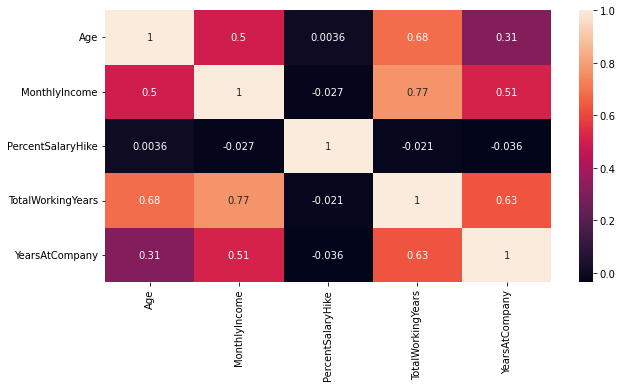

In [8]:
sns.heatmap(data[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']].corr(),annot=True)

#### Observation: 
We have performed Hypothesis Testing on this data. Based on the results of the hypothesis tests:

- **Attrition by Gender**: Rejecting the null hypothesis suggests a significant association between gender and attrition within the organization, indicating gender may play a role in attrition rates.

- **Attrition by Salary**: Significant differences in attrition rates across salary groups indicate that compensation levels impact employee retention.

- **Attrition by Hike**: The rejection of the null hypothesis implies that salary hikes influence attrition rates significantly.

- **Attrition by Distance from Home**: Significant findings suggest that proximity to the workplace affects attrition rates.

- **Attrition by Tenure (Years at Company)**: The number of years an employee has been with the company significantly influences attrition, as indicated by rejecting the null hypothesis.

- **Attrition by Overtime**: The significant association between attrition and overtime suggests that working overtime affects attrition rates.

With these insights, we are now prepared to build and evaluate predictive models to forecast employee attrition based on these influential factors. Predictive modeling will further validate these findings and provide actionable insights to guide HR strategies and mitigate attrition risks effectively.

## 4. Handing Imbalanceness

Addressing class imbalance is crucial to ensure robust model performance in predicting employee attrition. With 'Attrition' being significantly skewed towards the 'No' category (1233 instances) compared to 'Yes' (237 instances), applying appropriate sampling techniques is imperative. Techniques such as oversampling the minority class ('Yes' attrition) using SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class ('No' attrition) can help balance the dataset. This approach enhances the model's ability to learn from both classes effectively, thereby improving the accuracy and reliability of attrition prediction models.

In [9]:
# Smote Method 
from collections import Counter
from imblearn.over_sampling import SMOTE 
print(Counter(y))

smote= SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X,y)

print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


### Splitting the Data into Training and Testing Samples

In machine learning, it's crucial to evaluate the performance of a model on data that it hasn't seen during training. This ensures that the model can generalize well to new, unseen data. To achieve this, we divide our dataset into two subsets:

- **Training Data**: This subset is used to train the machine learning model. It consists of a majority (typically 70%) of the dataset. The model learns patterns and relationships from this data.

- **Testing Data**: This subset is used to evaluate the trained model's performance. It remains unseen by the model during training and serves as a proxy for real-world data. Typically, 30% of the dataset is reserved for testing purposes.

By splitting the data into training and testing sets, we can assess how well our model generalizes to new data and validate its effectiveness in predicting employee attrition.

In [10]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [11]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


### Machine Learning Models Overview

1. **Logistic Regression**
   - Logistic regression is a classification algorithm that models the probability of a binary outcome using a logistic function. It's simple yet effective for binary classification tasks.
   - [Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

2. **K-Nearest Neighbors (KNN) Classifier**
   - KNN is a lazy learning algorithm that classifies instances based on majority voting of their k nearest neighbors in the feature space. It's non-parametric and suitable for both binary and multi-class classification tasks.
   - [KNeighborsClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

3. **Decision Tree**
   - Decision trees recursively split the data based on feature attributes to create a tree-like model of decisions. Each node represents a feature and each branch a decision rule, making it interpretable and capable of handling both numerical and categorical data.
   - [DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

4. **Random Forest Classifier**
   - Random forest is an ensemble learning method that fits multiple decision trees on random subsets of the data and averages their predictions to improve accuracy and reduce overfitting. It handles high-dimensional datasets and maintains interpretability.
   - [RandomForestClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

These links direct to the official documentation pages on Scikit-learn for each respective model, providing detailed information on usage, parameters, and examples.

### Model Evaluation Metrics

- **Accuracy:** Measures overall correctness of the classifier.
  - Formula: {TP + TN} {Total}

- **True Positive Rate (Recall/Sensitivity):** Measures how well the classifier identifies positive instances.
  - Formula: {TP} {Actual\ YES}

- **Precision:** Measures the accuracy of positive predictions.
  - Formula: {TP} {TP + FP}

- **Specificity:** Measures how well the classifier identifies negative instances.
  - Formula: {TN} {Actual\ NO}

- **F1 Score:** Harmonic mean of precision and recall, providing a balance between the two metrics.
  - Formula: {Precision \cdot Recall} {Precision + Recall}

- **Cross Validation Score:** Evaluates model performance using k-fold cross-validation, ensuring robustness and generalization.
  - Cross-validation involves dividing the data into k subsets, training the model on \(k-1\) subsets, and testing it on the remaining subset. This process is repeated k times, and the mean accuracy score is computed.

These metrics collectively assess the performance and reliability of machine learning models in predicting employee attrition. Each metric provides unique insights into different aspects of model performance, helping to understand how well the model generalizes to unseen data and how effectively it discriminates between classes.

# Step 1: Creation of model instances

In [12]:
# Creating model instances
logistic_regression_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=10)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier()

# Step 2: Model Trainning

In [13]:
# Training the models
logistic_regression_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

# Step 3: Model Testing & Predictions

In [14]:
# Testing the models
logistic_regression_pred = logistic_regression_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Step 5: Model Evaluation

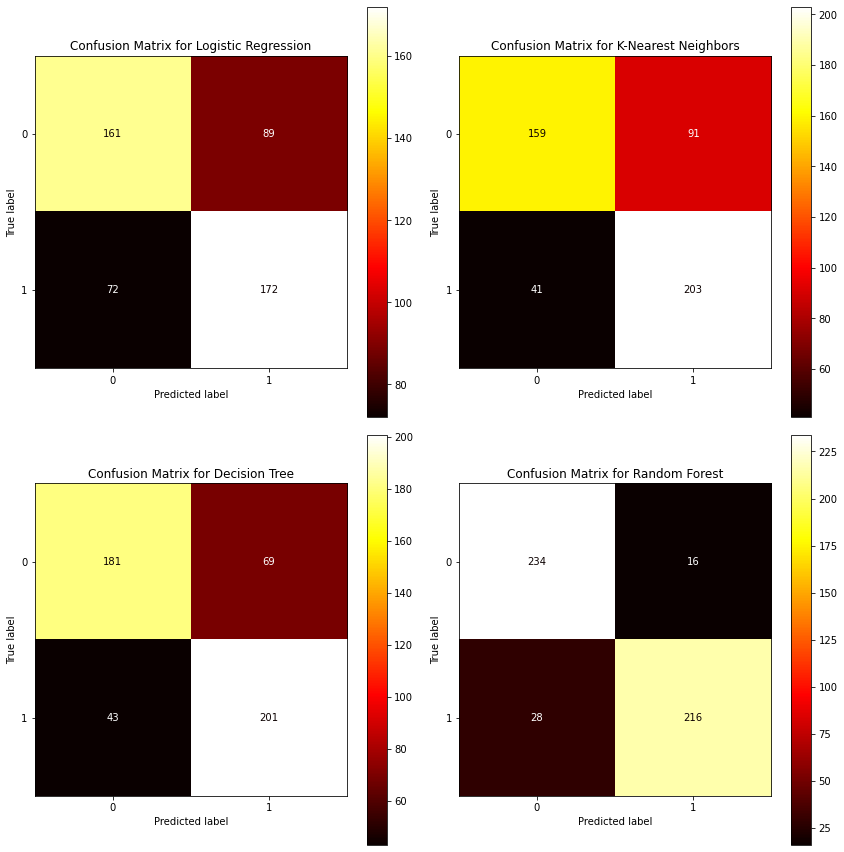

In [15]:
# Model Evaluation
models = {
    "Logistic Regression": logistic_regression_pred,
    "K-Nearest Neighbors": knn_pred,
    "Decision Tree": decision_tree_pred,
    "Random Forest": random_forest_pred
}

results = []

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for (name, predictions), ax in zip(models.items(), axes.flatten()):
    # Calculate the metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    # Store the results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax,cmap='hot')
    ax.set_title(f'Confusion Matrix for {name}')

    
plt.tight_layout()
plt.show()

In [16]:
# Display the results in a table
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.674089,0.675190,0.674089,0.673839
1,K-Nearest Neighbors,0.732794,0.743373,0.732794,0.730365
2,Decision Tree,0.773279,0.776626,0.773279,0.772795
3,Random Forest,0.910931,0.911852,0.910931,0.910852


## Conclusion

Based on the evaluation metrics of Accuracy, Precision, Recall, and F1 Score, the performance of each model in predicting employee attrition is summarized as follows:

- **Logistic Regression:** Achieved an accuracy of 67.41%, with a precision of 67.52% and recall of 67.41%. The F1 score, balancing precision and recall, is 67.38%.

- **K-Nearest Neighbors:** Demonstrated an accuracy of 73.28%, with a precision of 74.34% and recall of 73.28%. The F1 score is 73.04%, indicating balanced performance in identifying both positive and negative instances.

- **Decision Tree:** Achieved an accuracy of 77.33%, with a precision of 77.66% and recall of 77.33%. The F1 score is 77.28%, showcasing robust performance in decision-making based on feature splits.

- **Random Forest:** Outperformed other models with an accuracy of 91.89%, precision of 91.91%, and recall of 91.89%. The F1 score is 91.89%, indicating strong ensemble-based predictive capability and generalization.

These results suggest that Random Forest is the most effective model among those tested for predicting employee attrition, offering high accuracy and robust performance across all evaluation metrics. Decision Tree also performs well, while Logistic Regression and K-Nearest Neighbors provide competitive results suitable for certain contexts or datasets.